In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score

In [2]:
data=pd.read_excel('HR_Employee_Attrition_Dataset.xlsx')
data.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data.shape

(2940, 34)

In [4]:
data.dtypes

EmployeeNumber               int64
Attrition                   object
Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeNumber,2940.0,1470.500000,848.849221,1.0,735.75,1470.5,2205.25,2940.0
Age,2940.0,36.923810,9.133819,18.0,30.00,36.0,43.00,60.0
DailyRate,2940.0,802.485714,403.440447,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,2940.0,9.192517,8.105485,1.0,2.00,7.0,14.00,29.0
Education,2940.0,2.912925,1.023991,1.0,2.00,3.0,4.00,5.0
EnvironmentSatisfaction,2940.0,2.721769,1.092896,1.0,2.00,3.0,4.00,4.0
HourlyRate,2940.0,65.891156,20.325969,30.0,48.00,66.0,84.00,100.0
JobInvolvement,2940.0,2.729932,0.711440,1.0,2.00,3.0,3.00,4.0
JobLevel,2940.0,2.063946,1.106752,1.0,1.00,2.0,3.00,5.0
JobSatisfaction,2940.0,2.728571,1.102658,1.0,2.00,3.0,4.00,4.0


In [6]:
data.isnull().sum().T

EmployeeNumber              0
Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [7]:
# the target 'Attrition' has the data type object, need to be converted to categorical data type with binary values (0/1)
data['Attrition']=data['Attrition'].astype('category')
data['Attrition']=data['Attrition'].replace({'No':0,'Yes':1})

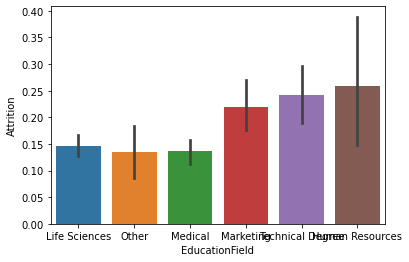

In [8]:
#2. EDA:
#Univariate analysis:

data['Department'].unique()
sns.distplot(data['Age'])
sns.barplot(data['EducationField'],data['Attrition']);

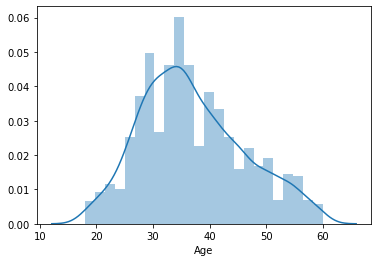

In [9]:
# Age
sns.distplot(data['Age'])
#Age dist curve shows a normal dist. and slightly right skewed.



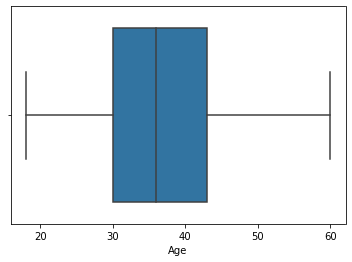

In [62]:
sns.boxplot(data['Age'])

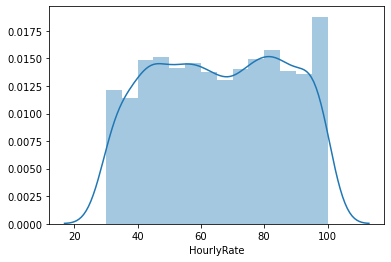

In [10]:
# HourlyRate 

sns.distplot(data['HourlyRate'])

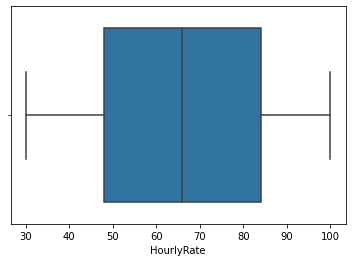

In [63]:
sns.boxplot(data['HourlyRate'])

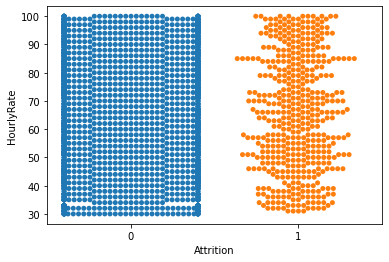

In [66]:
sns.swarmplot(data['Attrition'],data['HourlyRate']); 

In [12]:
# BusinessTravel



In [13]:
data=pd.get_dummies(data,columns=['BusinessTravel'])


In [14]:
data.columns

Index(['EmployeeNumber', 'Attrition', 'Age', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely'],
      dtype='object')

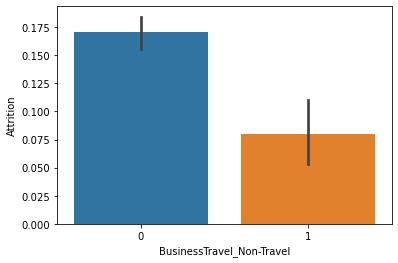

In [15]:
sns.barplot(data['BusinessTravel_Non-Travel'],data['Attrition']);

# staff who are not travelling is at risk of Attrition by 7.5%

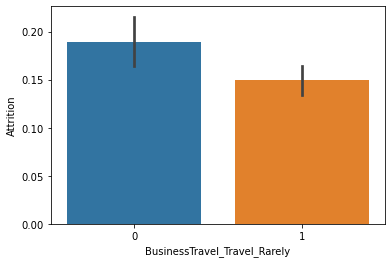

In [16]:
sns.barplot(data['BusinessTravel_Travel_Rarely'],data['Attrition']); 

# staff who are travelling rarely is at risk of Attrition by 14%

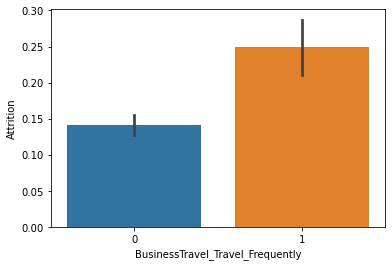

In [17]:
sns.barplot(data['BusinessTravel_Travel_Frequently'],data['Attrition']); 

# staff who are travelling frequently is at risk of Attrition by 24%

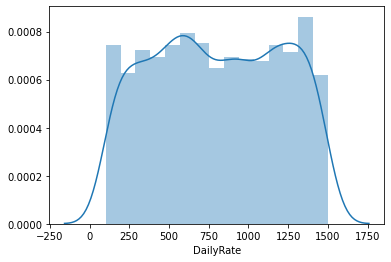

In [18]:
# DailyRate

sns.distplot(data['DailyRate'])

# DailyRate shows a uniform dist. curve

In [19]:
# Department

data['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

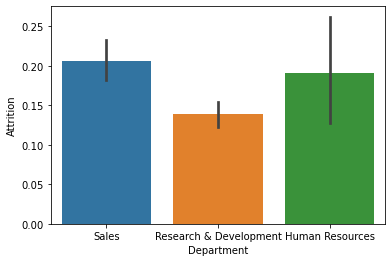

In [20]:
sns.barplot(data['Department'],data['Attrition']);

# Sales department has the largest no. of staff at Attrition risk

In [21]:
# Education

data['Education'].unique()

array([2, 1, 4, 3, 5], dtype=int64)

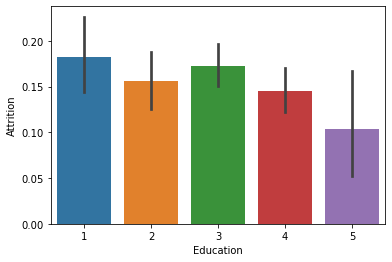

In [22]:
sns.barplot(data['Education'],data['Attrition']);

# the plot shows that the staff with below college education is the largest group at risk of Attrition,
#  and staff with PHDs is lowest one.

In [68]:
# EducationField

sns.swarmplot(data['EducationField'],data['Attrition']);

KeyError: 'EducationField'

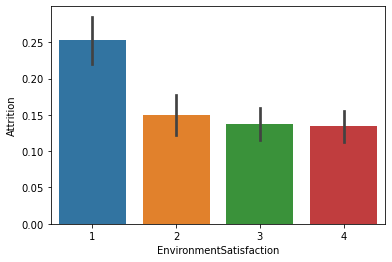

In [24]:
# EnvironmentSatisfaction

sns.barplot(data['EnvironmentSatisfaction'],data['Attrition']);

# shows that the staff with low Environment Satisfaction the largest group at risk of Attrition

In [25]:
# Gender

data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

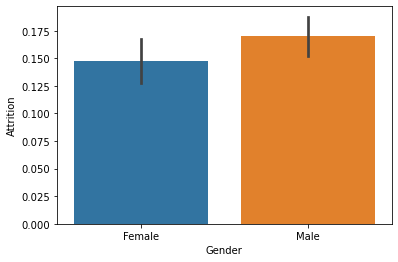

In [26]:
sns.barplot(data['Gender'],data['Attrition']);

# males are at risk of Attrition more than females.

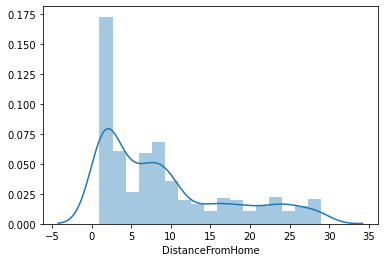

In [27]:
# DistanceFromHome

sns.distplot(data['DistanceFromHome']);

# the curve shows sever skewness to the right, many of the staff reside far from the office

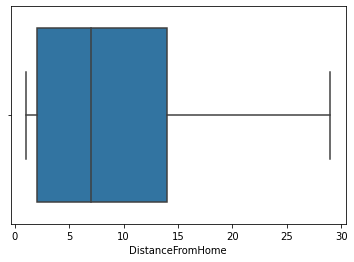

In [67]:
sns.boxplot(data['DistanceFromHome']);

In [28]:
#sns.pairplot(data,diag_kind='kde');

In [29]:
data.corr()

,EmployeeNumber,Attrition,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
EmployeeNumber,1.000000,-0.005184,-0.005175,-0.025742,0.016464,0.020950,0.008712,0.017377,-0.003552,-0.009020,...,-0.007047,0.011953,0.005370,-0.005779,-0.004427,-0.004575,-0.004716,0.011294,-0.004037,-0.004053
Attrition,-0.005184,1.000000,-0.159205,-0.056652,0.077924,-0.031373,-0.103369,-0.006846,-0.130016,-0.169105,...,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199,-0.074457,0.115143,-0.049538
Age,-0.005175,-0.159205,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,...,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.011215,-0.024743,0.028791
DailyRate,-0.025742,-0.056652,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,...,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,0.012096,-0.011776,0.002078
DistanceFromHome,0.016464,0.077924,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,...,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.023605,0.005081,-0.020116
Education,0.020950,-0.031373,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,...,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,0.004524,-0.008292,0.004126
EnvironmentSatisfaction,0.008712,-0.103369,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,...,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,0.003568,-0.012624,0.008496
HourlyRate,0.017377,-0.006846,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,...,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,-0.016994,-0.018819,0.027541
JobInvolvement,-0.003552,-0.130016,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,...,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,-0.045779,0.004424,0.026714
JobLevel,-0.009020,-0.169105,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,...,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.007295,-0.021557,0.023433


In [30]:
data.dtypes

EmployeeNumber                       int64
Attrition                            int64
Age                                  int64
DailyRate                            int64
Department                          object
DistanceFromHome                     int64
Education                            int64
EducationField                      object
EnvironmentSatisfaction              int64
Gender                              object
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
JobRole                             object
JobSatisfaction                      int64
MaritalStatus                       object
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
Over18                              object
OverTime                            object
PercentSalaryHike                    int64
PerformanceRating                    int64
Relationshi

In [31]:
# convert all objects to categorical data

data['Department']=data['Department'].astype('category')
data['EducationField']=data['EducationField'].astype('category')
data['Gender']=data['Gender'].astype('category')
data['JobRole']=data['JobRole'].astype('category')
data['MaritalStatus']=data['MaritalStatus'].astype('category')
data['Over18']=data['Over18'].astype('category')
data['OverTime']=data['OverTime'].astype('category')
data['Attrition']=data['Attrition'].astype('category')

In [32]:
data.dtypes

EmployeeNumber                         int64
Attrition                           category
Age                                    int64
DailyRate                              int64
Department                          category
DistanceFromHome                       int64
Education                              int64
EducationField                      category
EnvironmentSatisfaction                int64
Gender                              category
HourlyRate                             int64
JobInvolvement                         int64
JobLevel                               int64
JobRole                             category
JobSatisfaction                        int64
MaritalStatus                       category
MonthlyIncome                          int64
MonthlyRate                            int64
NumCompaniesWorked                     int64
Over18                              category
OverTime                            category
PercentSalaryHike                      int64
Performanc

In [33]:
data['Department'].unique()

[Sales, Research & Development, Human Resources]
Categories (3, object): [Sales, Research & Development, Human Resources]

In [34]:
data['EducationField'].unique()

[Life Sciences, Other, Medical, Marketing, Technical Degree, Human Resources]
Categories (6, object): [Life Sciences, Other, Medical, Marketing, Technical Degree, Human Resources]

In [35]:
data['JobRole'].unique()

[Sales Executive, Research Scientist, Laboratory Technician, Manufacturing Director, Healthcare Representative, Manager, Sales Representative, Research Director, Human Resources]
Categories (9, object): [Sales Executive, Research Scientist, Laboratory Technician, Manufacturing Director, ..., Manager, Sales Representative, Research Director, Human Resources]

In [36]:
data['MaritalStatus'].unique()

[Single, Married, Divorced]
Categories (3, object): [Single, Married, Divorced]

In [37]:
data['Over18'].unique()

[Y]
Categories (1, object): [Y]

In [38]:
data['OverTime'].unique()

[Yes, No]
Categories (2, object): [Yes, No]

In [39]:
data=pd.get_dummies(data,columns=['Department'])

In [40]:
data=pd.get_dummies(data,columns=['EducationField'])

In [41]:
data=pd.get_dummies(data,columns=['Gender'])

In [42]:
data=pd.get_dummies(data,columns=['JobRole'])

In [43]:
data=pd.get_dummies(data,columns=['MaritalStatus'])

In [44]:
data['OverTime']=data['OverTime'].replace({'No':0,'Yes':1})

In [45]:
data.head()

,EmployeeNumber,Attrition,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,1,41,1102,1,2,2,94,3,2,...,0,0,0,0,0,1,0,0,0,1
1,2,0,49,279,8,1,3,61,2,2,...,0,0,0,0,1,0,0,0,1,0
2,3,1,37,1373,2,2,4,92,2,1,...,1,0,0,0,0,0,0,0,0,1
3,4,0,33,1392,3,4,4,56,3,1,...,0,0,0,0,1,0,0,0,1,0
4,5,0,27,591,2,1,1,40,3,1,...,1,0,0,0,0,0,0,0,1,0


In [46]:
data.drop(['EmployeeNumber','Over18'],axis=1,inplace=True)

In [47]:
data.head()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,41,1102,1,2,2,94,3,2,4,...,0,0,0,0,0,1,0,0,0,1
1,0,49,279,8,1,3,61,2,2,2,...,0,0,0,0,1,0,0,0,1,0
2,1,37,1373,2,2,4,92,2,1,3,...,1,0,0,0,0,0,0,0,0,1
3,0,33,1392,3,4,4,56,3,1,3,...,0,0,0,0,1,0,0,0,1,0
4,0,27,591,2,1,1,40,3,1,2,...,1,0,0,0,0,0,0,0,1,0


In [48]:
# splitting the data

x=data.drop('Attrition',axis=1)
y=data['Attrition']

In [49]:
x.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,0,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,0,1,0
4,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,0,1,0


In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [51]:
# apply Logistic Regression model and fit to train and test data

model = LogisticRegression(solver="liblinear")
model.fit(x_train,y_train)
#predict on test
y_predict = model.predict(x_test)

In [52]:
# getting model coefficients and intercept:

data_coef= pd.DataFrame(model.coef_)
data_coef['intercept'] = model.intercept_
print(data_coef)

          0         1       2         3         4         5         6  \
0 -0.031255 -0.000155  0.0427  0.052001 -0.468082  0.002373 -0.463639   

          7         8        9  ...        42        43        44        45  \
0 -0.234783 -0.453784 -0.00006  ...  0.115866 -0.219466 -0.184357 -0.345157   

         46        47        48        49        50  intercept  
0 -0.121757  0.368065 -0.414743 -0.181506  0.597055   0.000806  

[1 rows x 52 columns]


In [53]:
# scoring the model on training data & testing data:

train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
print(train_score)
print(test_score)

0.8940719144800777
0.8843537414965986


In [54]:
# the trainning Accuracy is performing slightly better than testing one, but generally the testing performance is very good.

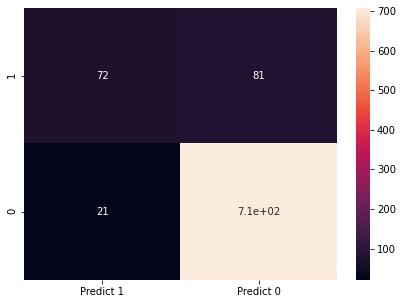

In [55]:
## Apply confusion matrix :

cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

data_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(data_cm, annot=True)

In [56]:
#confusion matrix conclusion:

#True Positives (TP): the model correctly predicted that the staff will attrite       72

#True Negatives (TN): the model correctly predicted that the staff will not attrite   710

#False Positives (FP): the model wrongly predicted that the staff will attrite        21  (Type I error)
#False Negatives (FN): the model wrongly predicted that the staff will not attrite    81  (Type II error)

In [57]:
 # Applying the other performence metrics:

print(recall_score(y_test,y_predict))

print(precision_score(y_test,y_predict))

print(f1_score(y_test,y_predict))

print(roc_auc_score(y_test,y_predict))

0.47058823529411764
0.7741935483870968
0.5853658536585367
0.720890825465989


In [58]:
# the model shows a very good perfomance in accurcy(88.4%) and precession(77.4%), good in ROC & AUC(72%) scoring, 
#but scores poorly in Recall(47%).

# the No. of False Negatives (FN) is high and need to be reduced to enhance the performance of the model.

In [59]:
print(data['Attrition'].value_counts(normalize=True))

0    0.838776
1    0.161224
Name: Attrition, dtype: float64


In [60]:
# as I found that thier is an imbalance in data, as the dist. is biased towards the staff will not attrite by 83.8% 
# against risk of staff attrition of 16.2%, so i will try to put some balance to the model to enhance the accuracy.

model2=LogisticRegression(random_state=1,class_weight='balanced')
model2.fit(x_train,y_train)
y_predict = model2.predict(x_test)
train_score2 = model2.score(x_train, y_train)
test_score2 = model2.score(x_test, y_test)
print(train_score2)
print(test_score2)

0.6185617103984451
0.6247165532879818


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
# The balanced model is scoring much less than the former model, so the first model will be used.